# Human Activity Recognition (HAR) explore

In [2]:
# Imports
import numpy as np
import os
from utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
%matplotlib inline

In [5]:
% ls ../../../arasdar/datasets/har-data/train/Inertial_Signals/

body_acc_x_train.txt*  body_gyro_x_train.txt*  total_acc_x_train.txt*
body_acc_y_train.txt*  body_gyro_y_train.txt*  total_acc_y_train.txt*
body_acc_z_train.txt*  body_gyro_z_train.txt*  total_acc_z_train.txt*


In [6]:
# Fixing the bug in the HAR dataset
# import os
# # Fixed params
# n_class = 6
# n_steps = 128

# # Paths
# # path_ = os.path.join(data_path='./data/', split='train')
# path_ = os.path.join('../../data/har-data/', 'train')
# path_
# path_signals = os.path.join(path_, "Inertial_Signals")
# path_signals

# split = 'train'

# # Read labels and one-hot encode
# label_path = os.path.join(path_, "y_" + split + ".txt")
# label_path
# labels = pd.read_csv(label_path, header = None)
# labels.shape

# # Read time-series data
# # path_signals, os.listdir(path='./data/train/Inertial Signals')
# channel_files = os.listdir(path=path_signals)
# # channel_files.sort()
# # n_channels = len(channel_files)
# # posix = len(split) + 5

In [7]:
X_train, labels_train, list_ch_train = read_data(data_path="../../../arasdar/datasets/har-data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="../../../arasdar/datasets/har-data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [8]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9


In [9]:
X_train.shape, X_train.dtype, labels_train.shape, labels_train.dtype

((7352, 128, 9), dtype('float64'), (7352,), dtype('int64'))

In [10]:
labels_train.max(), labels_test.max()

(6, 6)

In [11]:
(np.mean(labels_train==0), np.mean(labels_train==1), np.mean(labels_train==2),
np.mean(labels_train==3), np.mean(labels_train==4), np.mean(labels_train==5), np.mean(labels_train==6), 
np.mean(labels_train==7))

(0.0,
 0.16675734494015235,
 0.14594668117519041,
 0.13411316648531013,
 0.17491838955386291,
 0.18688792165397169,
 0.19137649619151251,
 0.0)

In [12]:
(np.mean(labels_test==0), np.mean(labels_test==1), np.mean(labels_test==2),
np.mean(labels_test==3), np.mean(labels_test==4), np.mean(labels_test==5), np.mean(labels_test==6), 
np.mean(labels_test==7))

(0.0,
 0.168306752629793,
 0.15982354937224297,
 0.14251781472684086,
 0.16661011197828299,
 0.18052256532066507,
 0.18221920597217509,
 0.0)

In [17]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

In [23]:
all_data.shape, X_train.shape, X_test.shape, means_.shape, stds_.shape

((10299, 128, 9), (7352, 128, 9), (2947, 128, 9), (128, 9), (128, 9))

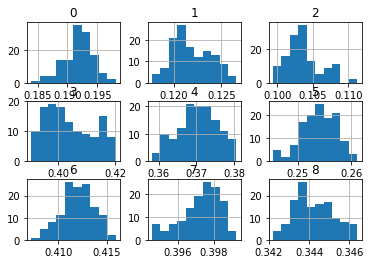

In [24]:
df_std.hist()
plt.show()

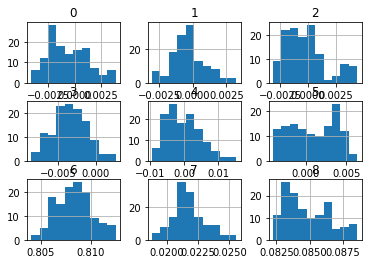

In [25]:
df_mean.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [26]:
X_train, X_test = standardize(X_train, X_test)

In [30]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

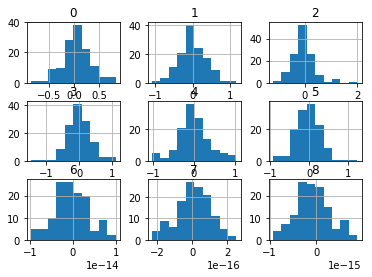

In [31]:
df_mean.hist()
plt.show()

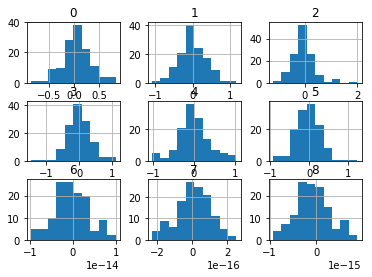

In [35]:
df_mean.hist()
plt.show()

In [34]:
df_std.shape, df_std.dtypes

((128, 9), 0    float64
 1    float64
 2    float64
 3    float64
 4    float64
 5    float64
 6    float64
 7    float64
 8    float64
 dtype: object)

In [36]:
X_data = np.concatenate((X_train, X_test))

In [37]:
X_data.shape, X_data.dtype, X_train.shape, X_test.shape, X_train.dtype, X_test.dtype

((10299, 128, 9),
 dtype('float64'),
 (7352, 128, 9),
 (2947, 128, 9),
 dtype('float64'),
 dtype('float64'))

In [45]:
X_data_mean = X_data.mean(axis=0, dtype=float)

In [46]:
X_data_mean.shape, X_data_mean.dtype

((128, 9), dtype('float64'))

In [47]:
X_data_mean_DataFrame = pd.DataFrame(data=X_data_mean)

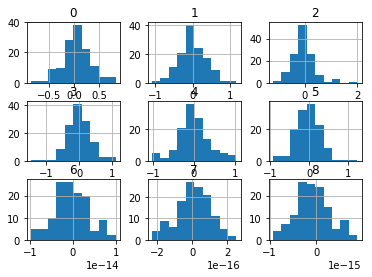

In [48]:
X_data_mean_DataFrame.hist()
plt.show()